# KNN (K-Nearest Neigbors)

- Mengklasifikasi suatu data point berdasarkan sejumlah $k$ data point tetangga terdekatnya.
    - Menghitung jarak antar data point dengan data point yang akan diklasifikasikan
    - Cari sejumlah $k$ data point terdekat dengan data point yang akan diklasifikasikan 
        
        $\Delta x = x - x_1$
        
        $\Delta y = y - y_1$
        
        $S = \sqrt {(\Delta x) ^ 2 + (\Delta y) ^ 2}$
    
    - Lihat mayoritas class dari $k$ data point terdekat tersebut
    - Klasifikasikan data point sesuai class mayoritas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
dfIris = pd.DataFrame(
    data['data'],
    columns = data['feature_names'],
)
dfIris['target'] = data['target']
dfIris['jenis'] = dfIris['target'].apply(lambda x: data['target_names'][x])
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,jenis
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


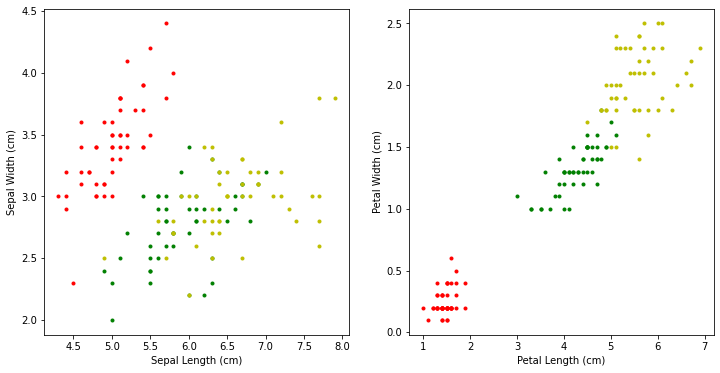

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target'] == 0], 
    dfIris['sepal width (cm)'][dfIris['target'] == 0], 'r.'
)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target'] == 1], 
    dfIris['sepal width (cm)'][dfIris['target'] == 1], 'g.'
)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target'] == 2], 
    dfIris['sepal width (cm)'][dfIris['target'] == 2], 'y.'
)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.subplot(122)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target'] == 0], 
    dfIris['petal width (cm)'][dfIris['target'] == 0], 'r.'
)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target'] == 1], 
    dfIris['petal width (cm)'][dfIris['target'] == 1], 'g.'
)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target'] == 2], 
    dfIris['petal width (cm)'][dfIris['target'] == 2], 'y.'
)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

<hr>

### Train Test Split

In [6]:
# splitting
from sklearn.model_selection import train_test_split

In [20]:
xtr, xts, ytr, yts = train_test_split(
    dfIris[dfIris.columns[:4]], 
    dfIris['target'],
    test_size=.2
)

In [26]:
len(xtr), len(xts), len(ytr), len(yts)

(120, 30, 120, 30)

<hr>

### K-Nearest Neighbors Classifier

In [27]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier()
model.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<hr>

### $k$ Value

- Default $k$ = ```n_neighbors``` = 5
- Most popular $k$ value:
    1. Hitung akar kuadrat dari jumlah $x$ training $\displaystyle \sqrt {n_(x_\textrm{training})}$
    2. Pilih angka yang ganjil sebagai $k$

In [49]:
# x = jumlah elemen x untuk training
def k(x):
    k = int(np.sqrt(x))
    if k % 2 == 0:
        k += 1
        return k
    else:
        return k

In [50]:
# cek nilai k
k(len(xtr))

11

In [51]:
model = KNeighborsClassifier(n_neighbors = k(len(xtr)))
model.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [52]:
model.predict(xtr)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 1])

In [59]:
np.array(ytr.to_list())

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 1])

In [62]:
dfIris['prediksi'] = model.predict(dfIris[dfIris.columns[:4]])
dfIris[dfIris['target'] != dfIris['prediksi']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,jenis,prediksi
83,6.0,2.7,5.1,1.6,1,versicolor,2
106,4.9,2.5,4.5,1.7,2,virginica,1


In [67]:
# model.predict_proba(dfIris[dfIris.columns[:4]])

In [64]:
# confusion matrix untuk data target multi label
from sklearn.metrics import multilabel_confusion_matrix

In [65]:
multilabel_confusion_matrix(
    dfIris['target'], dfIris['prediksi'], labels=[0, 1, 2]
)

array([[[100,   0],
        [  0,  50]],

       [[ 99,   1],
        [  1,  49]],

       [[ 99,   1],
        [  1,  49]]], dtype=int32)

<hr>

### Nearest Neighbors

- Menampilkan data tetangga terdekat dari suatu data point
- ```NearestNeighbors``` me-return: __jarak__ & __index__ data terdekat
- Data terdekat pertama == data point itu sendiri

In [68]:
from sklearn.neighbors import NearestNeighbors

In [81]:
x = NearestNeighbors(n_neighbors = 11)
x.fit(xtr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                 radius=1.0)

In [83]:
# melihat 11 data terdekat dari suatu data point
x.kneighbors([xtr.iloc[1]])

# return: jarak, index
# data terdekat ke-0 == data point itu sendiri

(array([[0.        , 0.24494897, 0.42426407, 0.43588989, 0.43588989,
         0.46904158, 0.46904158, 0.47958315, 0.48989795, 0.5       ,
         0.50990195]]),
 array([[  1,  15,  90, 103,  75,  83,  73,  89,  82,  37,  31]],
       dtype=int32))